In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt


In [2]:
# import dataset
df = pd.read_csv('TSLA.csv')

# look the dataset
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [3]:
df.shape

(639, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [6]:
df.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
df.describe().round(2)

,High,Low,Open,Close,Volume,Adj Close
count,639.00,639.00,639.00,639.00,6.390000e+02,639.00
mean,543.36,517.88,531.00,531.30,4.819130e+07,531.30
std,340.84,325.40,333.53,333.36,3.579030e+07,333.36
min,46.90,44.86,45.96,46.29,9.800600e+06,46.29
25%,170.26,162.38,167.35,164.78,2.392195e+07,164.78
50%,620.41,595.50,603.88,605.13,3.448900e+07,605.13
75%,796.58,767.74,779.45,781.30,6.329725e+07,781.30
max,1243.49,1217.00,1234.41,1229.91,3.046940e+08,1229.91


In [8]:
df.nunique().sort_values()

High         633
Open         633
Low          635
Close        638
Volume       638
Adj Close    638
Date         639
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [11]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,2019,9
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,2019,10
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,2019,10
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,2019,10
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,2019,10


Text(0.5, 1.0, 'The relation between Date of High & Low Value')

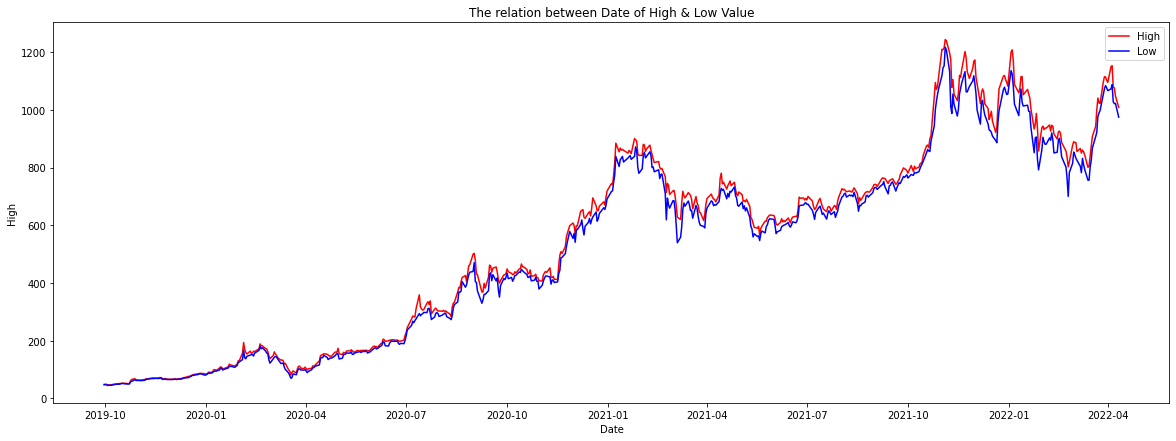

In [12]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x='Date', y='High', color='red', label='High')
sns.lineplot(data=df, x='Date', y='Low', color='blue', label='Low')

plt.title("The relation between Date of High & Low Value")

Text(0.5, 1.0, 'The relation between  Date of Open & Close value')

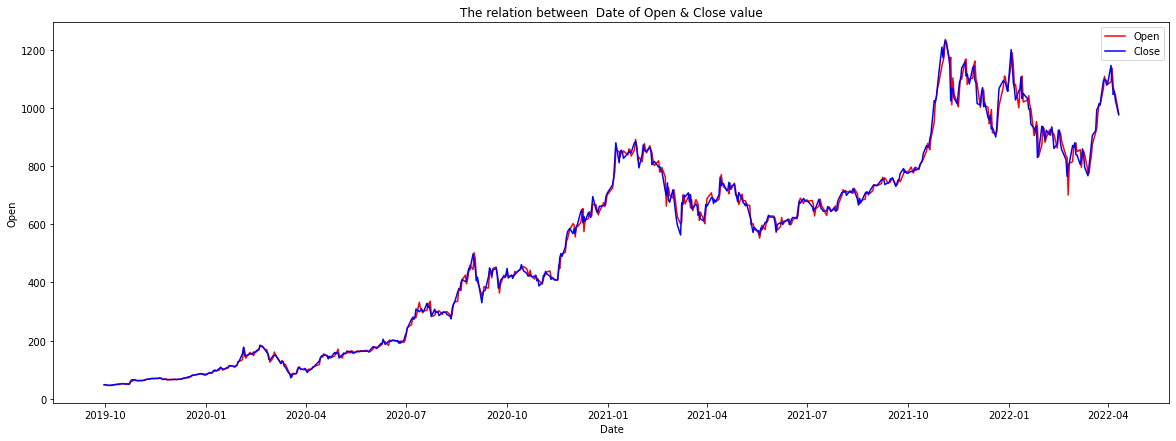

In [13]:

plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="Date",y="Open",color="red",label="Open")
sns.lineplot(data=df,x="Date",y="Close",color="blue",label="Close")

plt.title("The relation between  Date of Open & Close value")

Text(0.5, 1.0, 'The relation between Date & Volume')

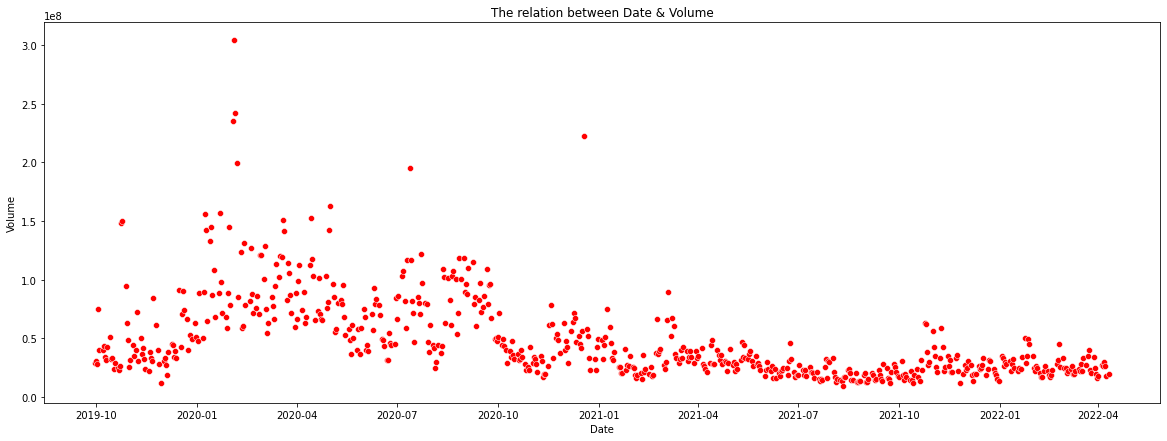

In [14]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=df, x='Date', y='Volume', color='red')
plt.title('The relation between Date & Volume')

In [15]:
df_by_year = df.groupby('Year')['High', 'Low', 'Open', 'Close'].mean().round(2)
df_by_year

C:\Temp\ipykernel_3556\142684393.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_year = df.groupby('Year')['High', 'Low', 'Open', 'Close'].mean().round(2)


,High,Low,Open,Close
Year,,,,
2019,65.61,63.69,64.49,64.81
2020,297.29,280.70,289.11,290.00
2021,795.73,762.71,779.84,779.99
2022,974.00,921.28,948.64,947.23


<AxesSubplot:xlabel='Year'>

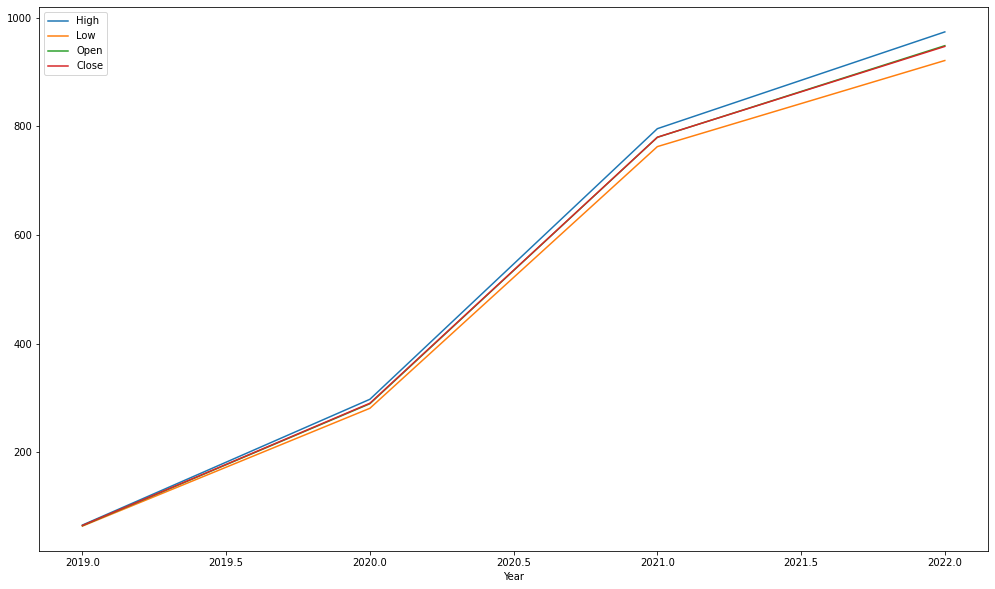

In [16]:
df_by_year.plot(figsize=(17, 10))

# Building ML Model

In [17]:
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, \
                            confusion_matrix, accuracy_score, r2_score

from decision_tree import MyDecisionTreeRegressor
from decision_tree_gain import MyDecisionTreeRegressorGain
from random_forest import RandomForestRegressor
from boosting import GradienBoosting

from sklearn.tree import DecisionTreeRegressor

In [18]:
df.drop(columns=["Date","Adj Close"], inplace=True)

In [19]:
X = np.array(df.drop(columns="Volume"))  
y = np.array(df['Volume'])

In [20]:
def get_metrics(X, y, n_folds=2, model=None, metric=mean_squared_error):

    kf = KFold(n_splits=n_folds, shuffle=True)
    kf.get_n_splits(X)

    er_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        predict = model.predict(X_test)
        er_list.append(metric(y_test, predict))
    
    return er_list

In [25]:
MAX_DEPTH = 4
MIN_SAMPLES_LEAF = 4


my_decision_tree = MyDecisionTreeRegressor(
    max_depth=MAX_DEPTH,
    min_samples_leaf=MIN_SAMPLES_LEAF,
)

my_decision_tree_gain = MyDecisionTreeRegressorGain(
    max_depth=MAX_DEPTH,
    min_samples_leaf=MIN_SAMPLES_LEAF,
    lmd=1.0,
    gamma=0.1,
)

my_random_forest = RandomForestRegressor(
    n_estimators=10,
    max_depth=MAX_DEPTH,
    min_samples_leaf=MIN_SAMPLES_LEAF
)

my_boosting = GradienBoosting(
    base_estimator = my_decision_tree,
    n_estimators=10,
    learning_rate=0.1,
    loss_function='squared_error',
)

algorithms = [my_decision_tree, my_decision_tree_gain, my_random_forest, my_boosting]

metrics = [get_metrics(X, y, n_folds=10, model=algo, metric=r2_score) for algo in algorithms]

fig7, ax7 = plt.subplots()
ax7.set_title('')
ax7.boxplot(metrics, labels=['My DT','My DT Gain', 'My Random Forest', 'My Boosting'])
plt.grid()
plt.show()


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Acer\AppData\Local\Program

AttributeError: 'RandomForestRegressor' object has no attribute '_subsample_size'